In [26]:
import os
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def save_pickle(data, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
        
data_saved_dir = r'D:\My Code\Classification\pickle_data'
train_val_data_path = os.path.join(data_saved_dir, 'A_preprocessed_data(256, 256).pkl')
train_images, train_labels, val_images, val_labels = load_pickle(train_val_data_path)

In [9]:
def augment_images(images, labels, augmented_images, augmented_labels, augmentations=2):
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    for i in range(len(images)):
        x = images[i]
        x = x.reshape((1,) + x.shape)

        for j, batch in enumerate(datagen.flow(x, batch_size=1)):
            augmented_images.append(batch[0])
            augmented_labels.append(labels[i])

            if j >= augmentations:
                break

train_augmented_images = []
train_augmented_labels = []
val_augmented_images = []
val_augmented_labels = []

augment_images(train_images, train_labels, train_augmented_images, train_augmented_labels)
augment_images(val_images, val_labels, val_augmented_images, val_augmented_labels)

In [11]:
train_augmented_images = np.array(train_augmented_images)
train_augmented_labels = np.array(train_augmented_labels)
val_augmented_images = np.array(val_augmented_images)
val_augmented_labels = np.array(val_augmented_labels)

print(f"Training images shape: {train_augmented_images.shape}")
print(f"Training labels shape: {train_augmented_labels.shape}")
print(f"Validation images shape: {val_augmented_images.shape}")
print(f"Validation labels shape: {val_augmented_labels.shape}")

Training images shape: (3456, 256, 256, 3)
Training labels shape: (3456,)
Validation images shape: (612, 256, 256, 3)
Validation labels shape: (612,)


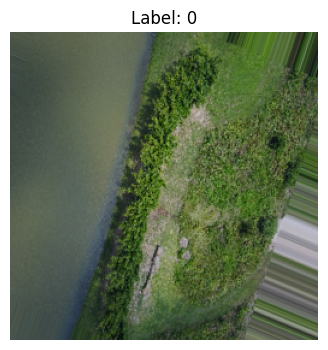

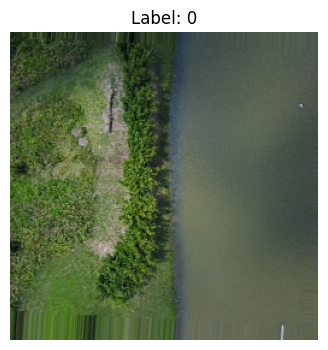

In [17]:
def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

display_images(train_augmented_images, train_augmented_labels, num_images=2)

In [18]:
train_indices = np.arange(len(train_augmented_images))
np.random.shuffle(train_indices)
train_augmented_images = train_augmented_images[train_indices]
train_augmented_labels = train_augmented_labels[train_indices]

val_indices = np.arange(len(val_augmented_images))
np.random.shuffle(val_indices)
val_augmented_images = val_augmented_images[val_indices]
val_augmented_labels = val_augmented_labels[val_indices]

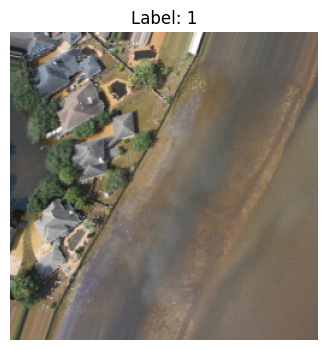

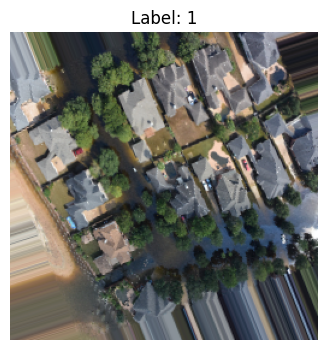

In [19]:
def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

display_images(train_augmented_images, train_augmented_labels, num_images=2)

In [20]:
combined_train_images = np.concatenate((train_images, train_augmented_images), axis=0)
combined_train_labels = np.concatenate((train_labels, train_augmented_labels), axis=0)

combined_val_images = np.concatenate((val_images, val_augmented_images), axis=0)
combined_val_labels = np.concatenate((val_labels, val_augmented_labels), axis=0)

In [21]:
train_indices = np.arange(len(combined_train_images))
np.random.shuffle(train_indices)
combined_train_images = combined_train_images[train_indices]
combined_train_labels = combined_train_labels[train_indices]

val_indices = np.arange(len(combined_val_images))
np.random.shuffle(val_indices)
combined_val_images = combined_val_images[val_indices]
combined_val_labels = combined_val_labels[val_indices]

In [31]:
print(f"Training images shape: {combined_train_images.shape}")
print(f"Training labels shape: {combined_train_labels.shape}")
print(f"Validation images shape: {combined_val_images.shape}")
print(f"Validation labels shape: {combined_val_labels.shape}")

Training images shape: (4608, 256, 256, 3)
Training labels shape: (4608,)
Validation images shape: (816, 256, 256, 3)
Validation labels shape: (816,)


In [32]:
train_label_counts = np.bincount(combined_train_labels)
val_label_counts = np.bincount(combined_val_labels)

print(f"Label distribution in combined training data: {train_label_counts}")
print(f"Label distribution in combined validation data: {val_label_counts}")

Label distribution in combined training data: [2036 2572]
Label distribution in combined validation data: [356 460]


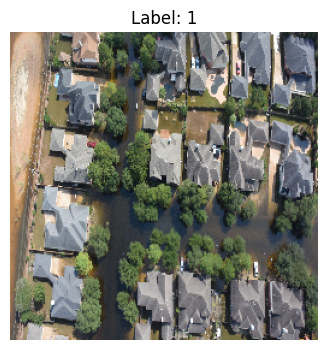

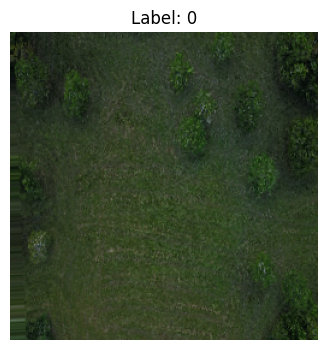

In [23]:
def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

display_images(combined_train_images, combined_train_labels, num_images=2)

In [25]:
output_dir = r'D:\My Code\Classification\pickle_data'
img_size = (256, 256)

with open(f'{output_dir}\C_preprocessed_data{img_size}.pkl', 'wb') as f:
    pickle.dump((combined_train_images, combined_train_labels, combined_val_images, combined_train_labels), f)

test_data_path = os.path.join(data_saved_dir, f'A_preprocessed_data test_images{img_size}.pkl')
test_images, test_labels = load_pickle(test_data_path)

with open(f'{output_dir}\C_preprocessed_data test_images{img_size}.pkl', 'wb') as f:
    pickle.dump((test_images, test_labels), f)

In [30]:
def save_images_and_labels(images, labels, save_path, prefix="augmented"):
    for i in range(len(images)):
        scaled_image = (images[i] - np.min(images[i])) / (np.max(images[i]) - np.min(images[i])) * 255
        image = Image.fromarray(np.uint8(scaled_image))

        label = labels[i]

        label_folder = os.path.join(save_path, str(label))
        os.makedirs(label_folder, exist_ok=True)

        image_path = os.path.join(label_folder, f"{prefix}-{i}.jpg")
        image.save(image_path)

dir = r"D:\Datasets\Classification\C"
save_images_and_labels(train_augmented_images, train_augmented_labels, dir, prefix="augmented")
save_images_and_labels(val_augmented_images, val_augmented_labels, dir, prefix="augmented")